# 　出発ゲート：一列にならんで、順番に　

***今回の話題:***

----

- リストとタブル　　一列に並んだデータを保持するデータ型
   - mutableとimmutable
- 繰り返し(for文、　リスト内包表記、ジェネレーター式)
- 簡単なグラフの作成
- (例外処理：入力値のチェック)

----

## 数列を作ってみる。

前回はPythonで関数を定義する方法の基本を学びました。
今回は、実際に数値の値を返す関数を定義して見ます。

まずフィボナッチの数列を求める関数を定義してみましょう。

## フィボナッチ数列とは？

フィボナッチ数列([1, 1, 2, 3, 5, 8, 13, 21,...])とは


$a_0 = 1$ 

$a_1 = 1$

$a_n = a_{n-1} + a_{n-2} \qquad \text{ ( for}\  n \gt 1 \text{ )}$

で定義される数列です。

漸化式を解いて、

$a_=\frac{1}{\sqrt 5}\left\lbrace(\frac{1+\sqrt 5}{2})^{n+1} -  (\frac{1-\sqrt 5}{2})^{n+1}\right\rbrace$

と定義することも可能です。　

##　関数としての数列
整数$n$に対してフィボナッチの数列の$n$番目の数、$a_n$は一意に定りますから、これを関数と考えることもできます。

$fib: n \mapsto a_n$

漸化式を直接使って、Pythonでこの数列を関数として表現して見ます。

In [1]:
def fib(n:int)->int:
    """
    フィボナッチ数列の　n番目(n:= 0,1,2,..)の値を求める。
    例：
    >>> fib(2)
    2
    >>> fib(5)
    8
    >>> fib(0), fib(1), fib(2), fib(3), fib(4), fib(5),
    (1, 1, 2, 3, 5, 8)
    """
    if n == 0 or n == 1:
        value= 1
    else:
        value= fib(n-1) + fib(n-2)
    return value

`return`は関数の呼び出し元に、関数の結果を送りだします。ここでは変数`value`の数値を返しています。Pythonでは、数値だけではなく様々なデータを返すことが可能です。

## helpメッセージ
`fib`の定義には`docstring`が含まれています。
これを使うことで、実行時にこの関数の使い方を確認することができます。

In [2]:
help(fib)

Help on function fib in module __main__:

fib(n: int) -> int
    フィボナッチ数列の　n番目(n:= 0,1,2,..)の値を求める。
    例：
    >>> fib(2)
    2
    >>> fib(5)
    8
    >>> fib(0), fib(1), fib(2), fib(3), fib(4), fib(5),
    (1, 1, 2, 3, 5, 8)



定義した関数 `fib(n)` が、正しくフィボナッチの数列を求めているかどうかを確かめて見ましょう。

In [3]:
fib(0), fib(1), fib(2), fib(3), fib(4), fib(5),

(1, 1, 2, 3, 5, 8)

とフィボナッチ数が正しく計算されていることが確認できました。

## 繰り返し： for文

さきほどは、`fib`関数の動作確認のために、`fib(0),...`などを書き並べました。

しかし、いちいち引数の値を書くのは大変です。

`for`文を使えば異なる引数の値に対して、関数の値を求めることも簡単です。

In [4]:
for i in range(0,10,1):
    print("fib(",i,")=",fib(i), end=", ")
print("...")

fib( 0 )= 1, fib( 1 )= 1, fib( 2 )= 2, fib( 3 )= 3, fib( 4 )= 5, fib( 5 )= 8, fib( 6 )= 13, fib( 7 )= 21, fib( 8 )= 34, fib( 9 )= 55, ...


printで　フォーマット文字列を使った例。次回の講座で説明します。

In [5]:
for i in range(0,10,1):
    print(f"fib({i}) = {fib(i)}", end=", ")
print("...")

fib(0) = 1, fib(1) = 1, fib(2) = 2, fib(3) = 3, fib(4) = 5, fib(5) = 8, fib(6) = 13, fib(7) = 21, fib(8) = 34, fib(9) = 55, ...


### for文

`for`文は

```
for <識別子> in <リストやタプルなどのオブジェクト:iterable> :
    <プログラム文>
    ...
```

の形をしています。この文を実行すると、`<リスト、タプル、などのオブジェクト>`の要素毎に、その値が`<識別子>`に割り当てられて、`:`の後に続く　`<プログラム文>`　が実行されます。

In [6]:
for i in range(0,10,1):
    print("fib(",i,")=", fib(i), end=", ")
print("...")

fib( 0 )= 1, fib( 1 )= 1, fib( 2 )= 2, fib( 3 )= 3, fib( 4 )= 5, fib( 5 )= 8, fib( 6 )= 13, fib( 7 )= 21, fib( 8 )= 34, fib( 9 )= 55, ...


この繰り返しの中で、`i`は `0`から始まり、`i < 10`の範囲で`1`ずつ増えていることがわかります。　
`list()`関数を使うことで明示的に値の範囲を確認できます。

`range(0,10,1)`は0から始まって、10以下の、1づつ増える整数の列を表現しています。

In [7]:
list(range(0, 10, 1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

`list`は`type`型オブジェクトです。　
`list()`は`list`型への変換あるいは`list`型オブジェクトの生成子ということになります。
`range(0,10,1)`は`range`クラスの生成子を使っていることになります。

In [8]:
type(range(0, 10, 1))

range

## リストとタプル(tuple)

`for`文を使うことで、　一連の$n$の値に対して、フィボナッチ数列の値を求めることができました。　せっかく計算したこれらの結果を印刷するだけでなく、データとして再利用できれば便利です。　

こうした一連のデータをまとめて表現するために、Pythonには`リスト` と `タブル` という2種類の一列に並んだデータを表現するデータ型が用意されています。

### リスト(list)
1から5までの整数に対するフィボナッチ数列の値を要素に持つ`リスト`は次のようにして、作ることができます。

In [9]:
list_of_fib=[ fib(0),fib(1),fib(2),fib(3),fib(4),fib(5) ]
print(list_of_fib)

[1, 1, 2, 3, 5, 8]


### タプル(tuple)
一方、1から5までの整数に対するフィボナッチ数列の値を要素に持つ`タプル`は次のように作ることができます。

In [10]:
tuple_of_fib=( fib(0),fib(1),fib(2),fib(3),fib(4),fib(5) )
print(tuple_of_fib)

(1, 1, 2, 3, 5, 8)


このように、リストは`[]`で囲まれたデータの並び、タプルは`()`で囲まれたデータの並びとして表現されます。

リストやタプルは、`for`文での変数の範囲を指定するために使うことができます。

In [11]:
print("for loop with a list:")
for i in list_of_fib:
    print(i, end=", ")

print("\n***")
print("for loop with a tuple:")
for i in tuple_of_fib:
    print(i, end=", ")
 

for loop with a list:
1, 1, 2, 3, 5, 8, 
***
for loop with a tuple:
1, 1, 2, 3, 5, 8, 

### リテラル定数としてのリストとタプル

- `リスト`:記号`[`と`]`でリストの要素を`,`で区切って並べる。　(`[1,2,3]`と`[1,2,3,]`は同じ意味)
- `タブル`:記号`(`と`)`でリストの要素を`,`で区切って並べる。(`(1,2,3)`と`(1,2,3,)`は同じ意味)
- `[]` は空のリスト(要素数が0）を表す。
- `()`は空のタプル（要素数が0）を表す。
- ***要素数が1のタプルは　`(1,)`と書く必要がある。*** [`（1）`は 数式と解釈されるため]

In [12]:
[1] == [1,], (1)==(1,)

(True, False)

### リスト／タプル　要素の取り出し。
リストやタプルの要素を取り出すことができます。

- 最初の要素は、 `S[0]` 
- 最後の要素は、　`S[-1]`
- $n+1$番目の要素は　`S[n]`
- $n+1$番目から$m+1$番目までの要素は　`S[n:m]`
- $n+1$番目から最後の要素までは　`S[n:]`
- $n+1$番目から$m+1$番目まで,$l$ 置きの要素は　`S[n:m:l]`


### list/tupleと要素指定
pythonでは*指標（インデックス）*は要素と要素の*間*を指していると考えると、理解しやすいでしょう。

![Pythonでのリスト／タプルの要素とインデックスの関係](./_images/list-tuple-index.png)

In [13]:
list_of_fib

[1, 1, 2, 3, 5, 8]

### 部分列の取り出し(スライス）

In [14]:
list_of_fib[0:-1:2]

[1, 2, 5]

`0:-1:2`はpythonではスライスと呼ばれます。

![Pythonでのリスト／タプルの要素とスライス](./_images/list-tuple-slice.png)

### 負の増分
スライスの増分を負の整数にすれば、リスト／タプルを逆順に取り出すことも可能です。

In [15]:
list_of_fib[:-8:-1]

[8, 5, 3, 2, 1, 1]

In [16]:
tuple_of_fib[:-8:-1]

(8, 5, 3, 2, 1, 1)

In [17]:
s= slice(0,-1,2) #スライスオブジェクトを作成する。
list_of_fib[s]

[1, 2, 5]

In [18]:
print([list_of_fib[0], list_of_fib[4]], (tuple_of_fib[0],tuple_of_fib[4]))
print(list_of_fib[2:5], tuple_of_fib[2:5])
print(list_of_fib[0:-1:2], tuple_of_fib[0:-1:2])

[1, 5] (1, 5)
[2, 3, 5] (2, 3, 5)
[1, 2, 5] (1, 2, 5)


In [19]:
print([list_of_fib[0], list_of_fib[4]], (tuple_of_fib[0],tuple_of_fib[4]))
print(list_of_fib[2:5], tuple_of_fib[2:5])
print(list_of_fib[0:-1:2], tuple_of_fib[0:-1:2])

[1, 5] (1, 5)
[2, 3, 5] (2, 3, 5)
[1, 2, 5] (1, 2, 5)


### 変更可能か変更不可能か、それが問題 :リストとタプルの使い分け


-　リストもタプルも　n番目(nは0始まり）の要素を　`[n]`を変数名(オブジェクト）に追加することで取り出すことができます。


ところが

- リストは要素を更新することができる。(mutable)
- タプルは要素を変更することができない。(immutable)

という大きな違いがあります。

リストの最初の要素(0番の要素）を置き換えてみます。

In [20]:
try:
    list_of_fib[0]=2; print("list:", list_of_fib)
except TypeError as err:
    print("TypeError:",err)

list: [2, 1, 2, 3, 5, 8]


tupleの要素を置き換えようとすると、...

In [21]:
try:
    tuple_of_fib[0]=2; print("tuple:", tuple_of_fib)
except TypeError as err:
        print("TypeError:",err)

TypeError: 'tuple' object does not support item assignment


とエラー（TypeError 例外発生)となります。
このように、　リストの要素を置き換えることはできますが、タプルの要素を置き換えることはできません。

#### リストへの要素の追加

リスト／タプルの要素の変更と同様に、リストに要素を追加する(`append`)ことはできますが、タプルに要素を追加することはできません。

In [22]:
#リストへの要素の追加 append
print("追加前：", id(list_of_fib), list_of_fib )
list_of_fib.append(fib(len(list_of_fib)))
print("追加後：", id(list_of_fib), list_of_fib)

追加前： 140681530275776 [2, 1, 2, 3, 5, 8]
追加後： 140681530275776 [2, 1, 2, 3, 5, 8, 13]


要素の追加前後で、リストの　`id`が変わっていないことに注意してください。

### タプルへの要素の追加

In [23]:
# タプルへの要素の追加
print("追加前：",id(tuple_of_fib), tuple_of_fib)
try:
    tuple_of_fib.append(fib(len(tuple_of_fib)))
    print("追加後：", id(tuple_of_fib), tuple_of_fib)
except AttributeError as err:
    print("AttributeError:", err)

tuple_of_fib=tuple_of_fib + (fib(len(tuple_of_fib)),)
print("追加後：",id(tuple_of_fib), tuple_of_fib)

追加前： 140681530408672 (1, 1, 2, 3, 5, 8)
AttributeError: 'tuple' object has no attribute 'append'
追加後： 140681530408576 (1, 1, 2, 3, 5, 8, 13)


というように、タプルに要素を追加することはできません。そもそもタプルは`.append`メソッドを持っていません（`AttributeError`）。

タプルに新しい要素を付け加えたタプルを作り直して、変数に割り当て直すことは可能です。

## リスト内包表記(List comprehension)　と ジェネレーター式(Generator expression)

### リスト内包表記(List comprehension)
フィボナッチ数列の最初の10項を成分にもつリストはリスト内包表記を使って作ることができます。

In [24]:
# リスト内包表記（list comprehension
list_of_fibs=[fib(i) for i in range(10)]
list_of_fibs

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

### ジェネレーター式(Generator expression)
ジェネレーター式はリスト内包表記に似た形ですが、`()`で囲われています。(リスト内包表記は`[]`)

ジェネレーター式の値は ジェネレーター　オブジェクトです。

ジェネレーター　オブジェクトは、`next()`で呼ばれるたびに、次の要素を値として返します。
[参考: このように、`next()`の呼び出しに対して、次々と値を返すオブジェクトを`iterable`と呼びます。]

In [25]:
# ジェネレーター式
g=(fib(i) for i in range(10))
print ("type of generator expression:", type(g))
for f in range(10):
    print(next(g),end=", ")

type of generator expression: <class 'generator'>
1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 

### for 文での　ジェネレーター式
ジェネレーター式は`for()`文で変数の範囲を示すために利用できます。

In [26]:
# ジェネレーター式
g=(fib(i) for i in range(10))
for i in g:
    print(i,end=", ")

1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 

In [27]:
for x in (fib(i) for i in range(10)):
    print (x, end=", ")

1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 

In [28]:
# generatorを使ってみる。
g=((fib(i) for i in range(10)))
try:
    while(x:=next(g)): # walrus 式
        print(x, end=" ")
except StopIteration:
    print()

1 1 2 3 5 8 13 21 34 55 


### ジェネレーター式とリスト内包表記の一般形
```
# Generator expression -- returns generator object(iterable)
stripped_iter = (line.strip() for line in line_list)

# List comprehension -- returns list
stripped_list = [line.strip() for line in line_list]
```

In [29]:
print([fib(i) for i in range(6)])

[1, 1, 2, 3, 5, 8]


### ジェネレーター式とリスト内包表記　とmap関数
ジェネレーター式/リスト内包表記は`map`関数とほぼ等価です。 
ジェネレーター式をつかえるようになって`map`の出番はなくなりました。

In [30]:
#　mapとリスト内包表記
map(fib, range(10)), list(map(fib, range(10)))

(<map at 0x7ff308ca81f0>, [1, 1, 2, 3, 5, 8, 13, 21, 34, 55])

In [31]:
for v in  map(fib, range(10)):
    print(v,end=", ")

type(map(fib, range(10)))

1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 

map

## Pythonに組み込みのデータ型
pythonのリストおよびタプルというデータ型を紹介しました。

ここで、pythonに組み込みのデータ型を挙げて見ます。今回取り上げないデータ型は後ほど取り上げてい行きます。
Pythonではさらに`class`文を使い、　新しいデータ型を定義することができます。　`class`文はブジェクト志向プログラム（OOP:Object Oriented Program)で使われます。
(`class`についてはまた別の機会に)

### 数
- 整数型
  - ***整数***　（`int`) ：明示的な桁数の制限はない(実行時にメモリが確保できる限りの桁数）
  - ***論理定数型***　(`bool`) : `True` と `False`
- *浮動小数点数* ($\ne$実数)　( `float`) : 倍精度浮動小数点数　（4倍精度浮動小数点などにはnumpyなどのライブラリを使う。）
    - mathモジュールdで`math.nan`, `math.inf`が定義されている。
    - numpyモジュールにも`numpy.nan`, `numpy.inf`がある。
- 複素数 (`complex`)　

数データには通常の四則演算(`+-*/`）の他にも、整数除算(`//`),剰余(`%`)などの演算も定義されている。

### コンテナ(データの集まり）

- シークェンス型: **immutable**
   - ***タプル型*** (`tuple`)
   - *文字列型*　　(`str`) : Pythonでは単独の文字というデータ型はありません。文字は1文字でも文字列型のデータとなります。　（文字列型　については次回取り上げます。）
   - *バイト型* (`bytes`)　:
   
- シークェンス型: **mutable**
   - ***リスト型*** ( `list` )
   - *バイト配列型*( bytearray )
   
- 集合
    -　集合型 (`set`　） :　mutableなオブジェクトは要素になれない。  例: { 1,2,3 ,"a","b","c"}
    -　不変な集合型　（ `frozenset` ): immutable & hashable
    
- *辞書型*　（ `dict` ) : 
    - `key`と`value`の組を要素にもつ。　例：　`d={'a':1,　'b':2,　}`
    -`key`による検索が可能。　　例: `d['a']` → 1
    - LISPの連想配列や、javascriptのobjectに似ている。

### プログラムの実行に係るデータ型

- ***ユーザ定義関数*** ( function ) : 関数定義文で生成される関数オブジェクト
- *クラス*　(`class`) ：`class`文によって生成される。
- モジュール( module )
- その他　....


## グラフを描いてみます。

数字が一列に並んだものがあると、グラフにして見なくなるのは、物理研究者の（？　）習い性です。

`matplotlib`ライブラリの中の`pyplot`モジュールを使って、フィボナッチ数列のグラフを描いてみます。

In [32]:
import matplotlib.pyplot as pyplot

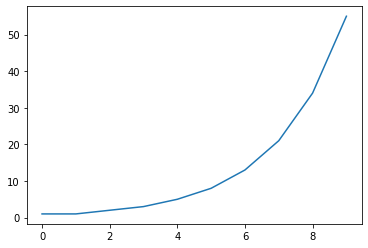

In [33]:
x=range(10)
pyplot.plot(x,[fib(n) for n in x])
        
pyplot.savefig("./_images/fibonacci.png")
pyplot.show()

###  fib()関数の実行速度についてのコメント
「Python入門講座」でのご質問の中で、`fib()`関数の実行測度についての回答にちょっと不正確なところがあったので、改めてご説明します。

まずここで定義したフィボナッチ関数の実行時間は、`timeit`モジュールを使うと`fib(40)`の計算に35秒かかっていることがわかります。(python3.9.7/macOS)

In [34]:
import timeit
timeit.timeit("(fib(40))", globals=globals(), number=1)

35.871306792

講座のお話の中では、Pythonホームページに掲載されているフィボナッチ数列のプログラムが早いというお話をしました。よくこのプログラムをみてみるとここで定義されている関数は、
引数に与えられた整数`n`以下のフィボナッチ数列を印刷するプログラムでした。

In [35]:
# version in Python.org
def fib_python_homepage(n):
    a, b = 0, 1
    while b < n :
        a, b = b, a+b
        print(a, end=", ")

fib_python_homepage(1000)

1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 

このプログラムを変更して、同じアルゴリズムで`n`番目のフィボナッチ数を求めるプログラムを`fib_python（）`としました。

In [36]:
def fib_python(n):
    a, b = 0, 1
    while n > 0 :
        a, b = b, a+b
        n-=1
    return b

[fib_python(n) for n in range(16)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

`fib_python()`の実行時間は、`fib_python(40)`で 5マイクロ秒、`fib_python(1000)`で　100マイクロ秒となりました。

In [37]:
print(timeit.timeit("(fib_python(40))", globals=globals(), number=1))
print(timeit.timeit("(fib_python(1000))", globals=globals(), number=1))

4.625000002533852e-06
0.00010066600000158132


ご質問にあった「途中結果を保存しておいて、高速化する」バージョンとして、次の`fibb()`を
定義してみました。
`fibb(1000)`の実行結果は、1回目が　700マイクロ秒前後、2回目が　1マイクロ秒前後となっています。1回目は`fib_python`に比べると遅いわけですが、同じ計算を繰り返し行う時は、効果が高くなっています。

In [38]:
def fibb(n, buf={}):
    if n not in buf:
        if n in (0,1):
            buf[n]=1
        else:
            buf[n]=fibb(n-2,buf)+fibb(n-1,buf)
    return buf[n]

num=1
print(timeit.timeit("(fibb(1000))", globals=globals(), number=num)/num)
print(timeit.timeit("(fibb(1000))", globals=globals(), number=num)/num,)
buf={}
print(timeit.timeit("(fibb(1000,buf))", globals=globals(), number=num)/num)
print(timeit.timeit("(fibb(1000,buf))", globals=globals(), number=num)/num)

0.0006977500000004966
7.089999982667905e-07
0.00043099999999896
4.999999987376214e-07


In [39]:
num=100
print(timeit.timeit("(fibb(1000,buf))", globals=globals(), number=num)/num)

1.5916000002391683e-07


# エラーの処理：例外(Exception)の送出と受信

フィボナッチ数列　$a_n$　は整数　$n$　について定義されています。
では、ここで定義した関数　`fib(n)`の`n`に整数でない数値をあたえると何が起きるでしょう？ 一例として`fib(1.1)`を計算してみます。

In [40]:
try:
    fib(1.1)
except Exception as e:
        print("Error:",e)

Error: maximum recursion depth exceeded in comparison


整数でない入力値`n`にたいしては停止条件`n==0` あるいは`n==1`が決して満たされないため、システムの条件までプログラムはある意味暴走してしまいます。
このように、関数に与えられた引数が適切なものであるかを判断し、条件が満たされない場合には、そのことを関数の呼び出しもとにつたえるための仕組みとして、**例外(Exception)**の仕組みが`python`には用意されています。

入力値のチェックを組み込んだ`fib`関数をご覧ください。

In [41]:
def fib(n:int)->int:
    """
    return a value of fibonacci series for integer n.

    >>> fib(10)
    89
    >>> fib(-1)
    Traceback (most recent call last):
    ...
    ValueError: n must be >= 0
    >>> fib(1.0)
    Traceback (most recent call last):
    ...
    TypeError: n must be an exact integer
    """
    if type(n) is not int:
        raise TypeError("n must be an exact integer")      
    if not n >= 0:
        raise ValueError("n must be >= 0")
    if n == 0 or n == 1:
        value = 1
    else:
        value= fib(n-1) + fib(n-2)
    return value

この関数で実際に`n=1.1`の`fib`関数を計算して見ます。

In [42]:
try:
    fib(1.1)
except Exception as e:
        print("Error:",e)

Error: n must be an exact integer


このように、整数以外の数値が引数として与えられたことがエラーの原因であることがすぐにわかります。

この定義ではdocstringも入れてあるので、`help`メッセージも表示されます。

In [43]:
help(fib)

Help on function fib in module __main__:

fib(n: int) -> int
    return a value of fibonacci series for integer n.
    
    >>> fib(10)
    89
    >>> fib(-1)
    Traceback (most recent call last):
    ...
    ValueError: n must be >= 0
    >>> fib(1.0)
    Traceback (most recent call last):
    ...
    TypeError: n must be an exact integer



さらに、`docstring`にはこの関数で予期される動作の例も書き込まれているので、
`doctest` をつかって、この定義が設計を満たしているかどうかを確認することが
できます。

In [44]:
import doctest
doctest.testmod(verbose=True)

Trying:
    fib(10)
Expecting:
    89
ok
Trying:
    fib(-1)
Expecting:
    Traceback (most recent call last):
    ...
    ValueError: n must be >= 0
ok
Trying:
    fib(1.0)
Expecting:
    Traceback (most recent call last):
    ...
    TypeError: n must be an exact integer
ok
4 items had no tests:
    __main__
    __main__.fib_python
    __main__.fib_python_homepage
    __main__.fibb
1 items passed all tests:
   3 tests in __main__.fib
3 tests in 5 items.
3 passed and 0 failed.
Test passed.


TestResults(failed=0, attempted=3)

In [45]:
doctest.testmod(verbose=False)

TestResults(failed=0, attempted=3)

In [46]:
n=8
try:
    r=fib(n)
except TypeError as err:
    print("TypeError:", err)
except ValueError as err:
    print("ValueError:", err)
else:
    print(r)

34


##　おまけ：プログラムの実行速度を測ってみよう
`timeit` モジュールを使って、関数の実行速度を調べて見ます。

In [47]:
import timeit
timeit.timeit("fib(1)",setup="from __main__ import fib", number=100)/100

2.1374999995771304e-07

In [48]:
timeit.timeit("fib(10)",setup="from __main__ import fib", number=100)/100

3.144791000003977e-05

In [49]:
timeit.timeit("fib(20)",setup="from __main__ import fib", number=10)/10

0.003866404200000062

In [50]:
timeit.timeit("fib(30)",setup="from __main__ import fib", number=10)/10

0.45605662920000045

In [51]:
timeit.timeit("fib(33)",setup="from __main__ import fib", number=1)

1.9436441659999986

In [52]:
timeit.timeit("fib(36)",setup="from __main__ import fib", number=1)

8.220809000000003

In [53]:
timeit.timeit("fib(40)", setup="from __main__ import fib", number=1)

56.210244083999996

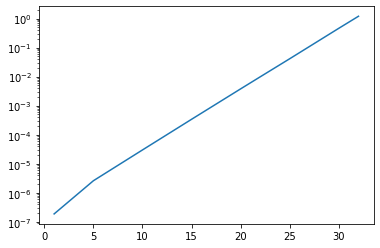

In [54]:
pyplot.semilogy()
pyplot.plot(
    [1,5,10,15,20,22,25,30,32],
    [timeit.timeit("fib(1)", setup="from __main__ import fib", number=100)/100,
     timeit.timeit("fib(5)", setup="from __main__ import fib", number=100)/100,
     timeit.timeit("fib(10)", setup="from __main__ import fib", number=100)/100,
     timeit.timeit("fib(15)", setup="from __main__ import fib", number=10)/10,
     timeit.timeit("fib(20)", setup="from __main__ import fib", number=10)/10,
     timeit.timeit("fib(22)", setup="from __main__ import fib", number=10)/10,
     timeit.timeit("fib(25)", setup="from __main__ import fib", number=1)/1,
     timeit.timeit("fib(30)", setup="from __main__ import fib", number=1)/1,
     timeit.timeit("fib(32)", setup="from __main__ import fib", number=1)/1,
    ]
)

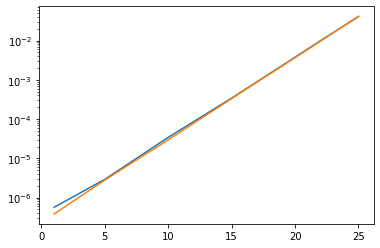

In [55]:
tl=[1,5,10,15,20,22,25]
pyplot.semilogy()

pyplot.plot(
    tl,
    [timeit.timeit("fib({})".format(t), setup="from __main__ import fib",
                   number=5)/5
     for t in tl])

pyplot.plot(
    tl,
    [timeit.timeit(f"fib({t})", setup="from __main__ import fib",
                   number=5)/5
     for t in tl])

# おまけその2：高速化に挑戦して見ましょう。

In [56]:
import logging
logging.getLogger('root').setLevel(logging.WARN)
#logging.getLogger('root').setLevel(logging.DEBUG)

In [57]:
def fib(n:int)->int:
    logging.debug("-> fib({})".format(n))
    if n == 0 or n == 1:
        value= 1
    else:
        value= fib(n-1) + fib(n-2)
    logging.debug(f"fib({n}) -> {value}")
    return value

In [58]:
fib(4)

5

In [59]:
def fibb(n, buf={}):
    logging.debug("-> fibb({},{})".format(n,buf))
    if n not in buf:
        if n == 0 or n == 1:
            buf[n]=1
        else:
            buf[n]=fibb(n-2,buf)+fibb(n-1,buf)
    logging.debug(f"fibb({n},{buf})->{buf[n]}")
    return buf[n]

In [60]:
fibb(4,{})

5

In [61]:
fibb(10,{})

89

In [62]:
fibb(10)

89

In [63]:
d={}
fibb(10,d)

89

In [64]:
fibb(10,d)

89

In [65]:
def fibb(n, /, buf={}):
    if n not in buf:
        if n == 0 or n == 1:
            buf[n]=1
        else:
            buf[n]=fibb(n-2,buf)+fibb(n-1,buf)
    return buf[n]
[fibb(n) for n in range(16)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

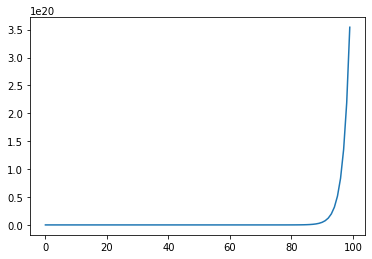

In [66]:
pyplot.plot([fibb(n) for n in range(100)])

In [67]:
import timeit

In [68]:
timeit.timeit(
"fib(100)",
setup="""
def fib(n, buf={}):
    if n not in buf:
        if n == 0 or n == 1:
            buf[n]=1
        else:
            buf[n]=fib(n-2)+fib(n-1)
    return buf[n]
""",number=100)

5.550000000198452e-05

In [69]:
timeit.timeit(
"""
fib(30)
""",
    setup=
"""
def fib(n,buf=dict()):
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1)+fib(n-2)
    return buf[n] 
""",
    number=1)

0.3065893330000051

In [70]:
m=0
d=m
def fib(n):
    m=n
    d=2*m
    def fib1(n,buf={}):
        nonlocal m
        global d
        d -=1
        logging.debug(f"{m} {d} {n} {buf}")
        if n not in buf:
            if n in (0,1):
                buf[n]=1
            else:
                buf[n]=fib1(n-2)+fib1(n-1)
        logging.debug(f"{m} {d} {n} {buf} -> {buf[n]}")
        return buf[n]
    return fib1(n)

In [71]:
fib(10)

89

In [72]:
fib(11)

144

In [73]:
timeit.timeit("fib(1000)",setup="from __main__ import fib",number=10)/10

0.6705705832999996

In [74]:
timeit.timeit("fib(1000)",globals=globals(),number=1)

0.6665530840000002

In [75]:
def fib_b(n):
    def fib1(n,buf={}):
        #print(n,buf)
        if n not in buf:
            if n in (0,1):
                buf[n]=1
            else:
                buf[n]=fib1(n-2)+fib1(n-1)
        #print(n,buf,"->",buf[n])
        return buf[n]
    return fib1(n)

def fib_c(n):
    buf={}
    def fib1(n):
        nonlocal buf # python version >= 3
        #print(n,buf)
        if n not in buf:
            if n in (0,1):
                buf[n]=1
            else:
                buf[n]=fib1(n-2)+fib1(n-1)
        #print(n,buf,"->",buf[n])
        return buf[n]
    return fib1(n)

0.00044004100000449853

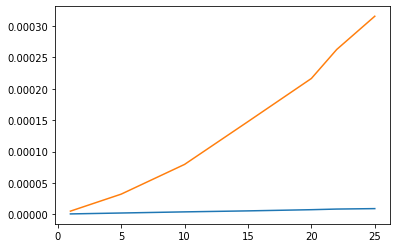

In [76]:
tl=[1,5,10,15,20,22,25]
pyplot.plot(
    tl,
    [timeit.timeit(f"fibb({t},dict())", setup="from __main__ import fibb",
                   number=5)/5
     for t in tl])

pyplot.plot(
    tl,
    [timeit.timeit("fib({})".format(t), setup="from __main__ import fib",
                   number=5)/5
     for t in tl])

import timeit
timeit.timeit("(fibb(1000))", globals=globals(), number=1)

In [77]:
# version in Python.org
def fib_upto_n_python(n):
    a, b = 0, 1
    while b < n :
        a, b = b, a+b
        print(a, end=", ")

fib_upto_n_python(1000)
    
def fib_python(n):
    a, b = 0, 1
    while n > 0 :
        a, b = b, a+b
        n-=1
    return b

[fib_python(n) for n in range(16)]

1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

In [78]:
import timeit
timeit.timeit("(fib_upto_n_python(1000))", globals=globals(), number=1)

1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 

0.000437207999993916

In [79]:
timeit.timeit("(fib_python(1000))", globals=globals(), number=1)

0.00010179099999163554

In [80]:
(timeit.timeit("(fib_b(1000))", globals=globals(), number=1),
 timeit.timeit("(fib_b(1000))", globals=globals(), number=1))

(0.0004622919999945907, 0.00043295800000464624)

In [81]:
def fibb(n, /, buf={}):
    if n not in buf:
        if n in (0,1):
            buf[n]=1
        else:
            buf[n]=fibb(n-2,buf)+fibb(n-1,buf)
    return buf[n]
(timeit.timeit("(fibb(1000))", globals=globals(), number=1),
timeit.timeit("(fibb(1000))", globals=globals(), number=1),
 timeit.timeit("(fibb(1000,{}))", globals=globals(), number=1))

(0.00043241600000953895, 5.410000056826902e-07, 0.0004169589999918344)

In [82]:
(timeit.timeit("(fib_c(1000))", globals=globals(), number=1),
 timeit.timeit("(fib_c(1000))", globals=globals(), number=1))

(0.0004345420000078093, 0.00039570799999921746)

# Collatz 予想
数列の例としては、Collatz予想の数列も候補の一つです。

In [83]:
def collatz(n:int)->int:
    """
    Collatz 予想：整数$n$から出発し、
    nが偶数であれば2で割った値、さもなければ3*n+1を次の値とすることを
    繰り返したとき、この数列は有限回で $1$に到達する。
    """
    if n % 2 == 0:
        return n//2
    else:
        return 3*n+1

In [84]:
n=14
while((n:=collatz(n))!=1):
    print(n, end=", ")

7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 

In [85]:
# while文の例
# 「初めてのプログラミング」　7.3 ループの例題から
while (instr:=input("もう帰るの？"))!="さようなら":
    print(instr)

print("またきてくださいね")

もう帰るの？ さようなら


またきてくださいね


In [86]:
def func(p1, p2, po1=0, po2=1,/,k1=2,k2=4,*args,ko1,ko2,**env):
    return f"({p1=},{p2=},{po1=},{po2=},{k1=},{k2=},{ko1=}"\
 f",{ko2=},{args=},{env=})"

In [87]:
func(1,2,3,4,5,6,7,po2=2,p1=0,ko1=0,ko2=1)

"(p1=1,p2=2,po1=3,po2=4,k1=5,k2=6,ko1=0,ko2=1,args=(7,),env={'po2': 2, 'p1': 0})"

In [88]:
import sys
sys.version_info

sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)